In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# =========================================
# Script: Red neuronal para predecir "Baja general"
# =========================================

# --- Instalación de librerías (solo la 1ra vez en Colab) ---
!pip install tensorflow scikit-learn pandas joblib

# --- Importación de librerías ---
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib


In [ ]:
# =========================================
import pandas as pd
from sklearn.model_selection import train_test_split
# 1. CARGAR DATOS
# Cargar el archivo limpio (ajusta el nombre si es diferente)
df = pd.read_csv("/content/drive/MyDrive/Base_NA_Final.csv")

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["Baja General", "Estatus", "Alta General"], errors="ignore")
y = df["Baja General"]

# 🔹 Convertir variables categóricas en variables dummy (0/1)
X = pd.get_dummies(X, drop_first=True)

# Dividir en train y test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test :", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test :", y_test.shape)



Tamaño de X_train: (1141, 531)
Tamaño de X_test : (286, 531)
Tamaño de y_train: (1141,)
Tamaño de y_test : (286,)


In [ ]:
# =========================================
# 2. ESCALADO DE VARIABLES
# =========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
# =========================================
# 3. DEFINICIÓN DEL MODELO
# =========================================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),   # Regularización
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # salida binaria
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name="auc")])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,161 (141.25 KB)

 Trainable params: 36,161 (141.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# =========================================
# 4. ENTRENAMIENTO
# =========================================
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5117 - auc: 0.5257 - loss: 0.8137 - val_accuracy: 0.7168 - val_auc: 0.7474 - val_loss: 0.5951
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6948 - auc: 0.7353 - loss: 0.6482 - val_accuracy: 0.7448 - val_auc: 0.7979 - val_loss: 0.5466
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7765 - auc: 0.8623 - loss: 0.4782 - val_accuracy: 0.7692 - val_auc: 0.8278 - val_loss: 0.5120
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7940 - auc: 0.8717 - loss: 0.4538 - val_accuracy: 0.7832 - val_auc: 0.8504 - val_loss: 0.4880
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8360 - auc: 0.9159 - loss: 0.3781 - val_accuracy: 0.7972 - val_auc: 0.8621 - val_loss: 0.4703
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8559 - auc: 0.9403 - loss: 0.3225 - val_accuracy: 0.8042 - val_auc: 0.8687 - val_loss: 0.4633
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

In [ ]:
# =========================================
# 5. EVALUACIÓN
# =========================================
y_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_proba >= 0.5).astype(int)

print("\n🔹 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("🔹 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("🔹 ROC AUC:", roc_auc_score(y_test, y_proba))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

🔹 Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.78      0.77      0.77       126
        True       0.82      0.82      0.82       160

    accuracy                           0.80       286
   macro avg       0.80      0.80      0.80       286
weighted avg       0.80      0.80      0.80       286

🔹 Matriz de confusión:
[[ 97  29]
 [ 28 132]]
🔹 ROC AUC: 0.8627232142857143



🔹 Historial de entrenamiento:


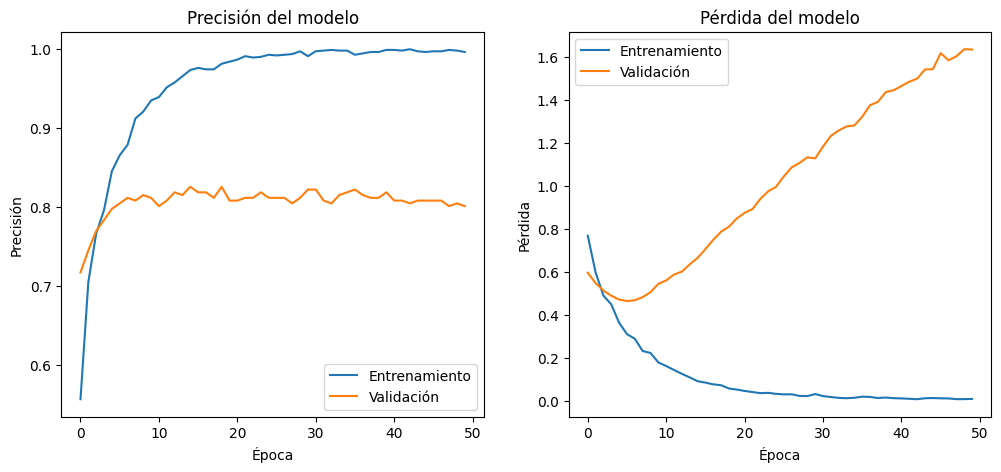


🔹 Curva ROC:


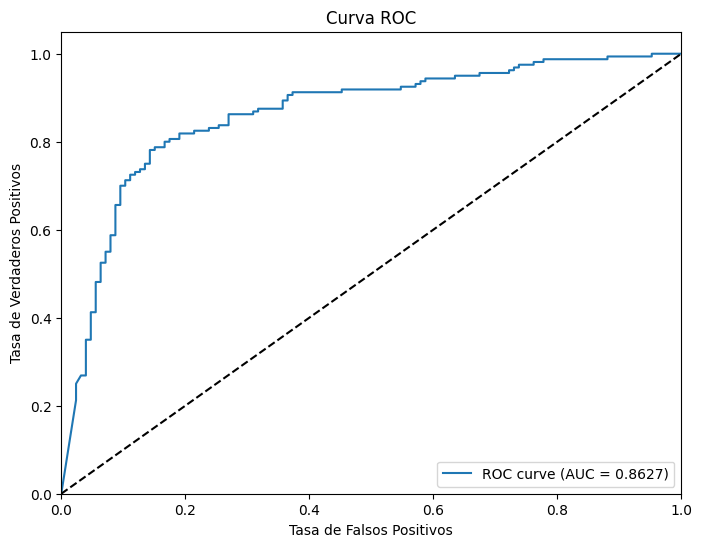


🔹 Matriz de confusión (Heatmap):


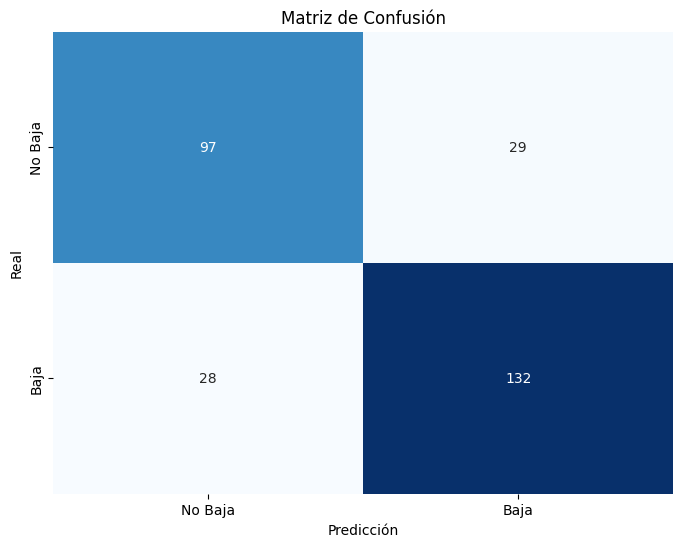

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Plotting training history
print("\n🔹 Historial de entrenamiento:")
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()

plt.show()

# Plotting ROC curve
print("\n🔹 Curva ROC:")
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Plotting Confusion Matrix
print("\n🔹 Matriz de confusión (Heatmap):")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Baja', 'Baja'], yticklabels=['No Baja', 'Baja'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()